In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
mydata = pd.read_csv('.\\datasets\\mycar.csv')

In [3]:
mydata.head(2)

,Speed,Stopping_dist
0,4,2
1,4,10


In [4]:
X = mydata.iloc[:,:-1].values

In [5]:
X

array([[ 4],
       [ 4],
       [ 7],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [10],
       [10],
       [11],
       [11],
       [12],
       [12],
       [12],
       [12],
       [13],
       [13],
       [13],
       [13],
       [14],
       [14],
       [14],
       [14],
       [15],
       [15],
       [15],
       [16],
       [16],
       [17],
       [17],
       [17],
       [18],
       [18],
       [18],
       [18],
       [19],
       [19],
       [19],
       [20],
       [20],
       [20],
       [20],
       [20],
       [22],
       [23],
       [24],
       [24],
       [24],
       [25]], dtype=int64)

In [6]:
Y = mydata.iloc[:,1].values

In [7]:
Y

array([ 2, 10,  4, 22, 16, 10, 18, 26, 34, 17, 28, 14, 20, 24, 28, 26, 34,
       34, 46, 26, 36, 60, 80, 20, 26, 54, 32, 40, 32, 40, 50, 42, 56, 76,
       84, 36, 46, 68, 32, 48, 52, 56, 64, 66, 54, 70, 92, 93, 85],
      dtype=int64)

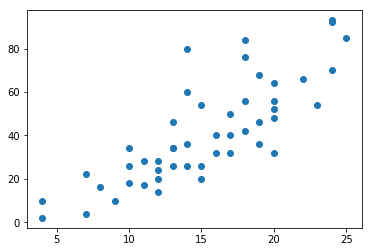

In [8]:
plt.scatter(X,Y)
plt.show()

In [9]:
mydata.corr()

,Speed,Stopping_dist
Speed,1.000000,0.804632
Stopping_dist,0.804632,1.000000


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
myModel = LinearRegression()

In [14]:
myModel.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
myModel.coef_

array([3.60017067])

In [16]:
myModel.intercept_

-16.308638144369922

In [17]:
y_predict = myModel.predict(X_test)

In [18]:
y_predict

array([19.69306854, -1.90795547, 70.0954579 , 23.29323921,  8.89255653,
       19.69306854, 34.09375121, 34.09375121, 48.49443389, 30.49358054,
       26.89340988, 19.69306854, 26.89340988, 30.49358054, 73.69562856])

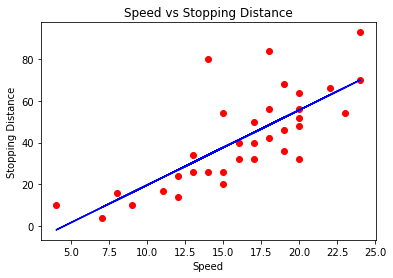

In [19]:
plt.scatter(X_train, Y_train, color = 'r')
plt.plot(X_train, myModel.predict(X_train), color ='b')
plt.title('Speed vs Stopping Distance')
plt.xlabel('Speed')
plt.ylabel('Stopping Distance')
plt.show()

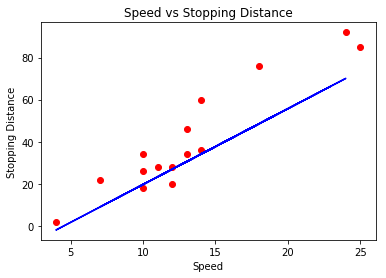

In [20]:
plt.scatter(X_test, Y_test, color ='r')
plt.plot(X_train, myModel.predict(X_train), color = 'b')
plt.title('Speed vs Stopping Distance')
plt.xlabel('Speed')
plt.ylabel('Stopping Distance')
plt.show()

## Multi Variable regression

In [21]:
import pandas as mypanda
import numpy as np
from scipy import stats as mystats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols as myols
from statsmodels.stats.anova import anova_lm

In [22]:
myData=mypanda.read_csv('.\\datasets\\Mult_Reg_Yield.csv')
myData

,Time,Temperature,Yield
0,130,190,35.0
1,174,176,81.7
2,134,205,42.5
3,191,210,98.3
4,165,230,52.7
5,194,192,82.0
6,143,220,34.5
7,186,235,95.4
8,139,240,56.7
9,188,230,84.4


In [23]:
tmp=myData.Temperature
yld =myData.Yield
time=myData.Time

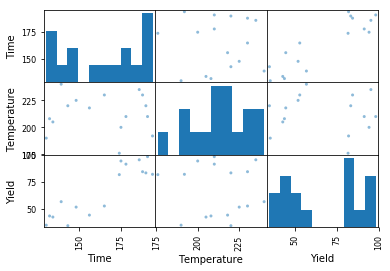

In [26]:
scatter_matrix(myData)
plt.show()

In [27]:
np.corrcoef(tmp,yld)

array([[ 1.        , -0.05456951],
       [-0.05456951,  1.        ]])

In [28]:
np.corrcoef(time,yld)

array([[1.        , 0.89671196],
       [0.89671196, 1.        ]])

In [29]:
np.corrcoef(time,tmp)

array([[ 1.        , -0.00756007],
       [-0.00756007,  1.        ]])

In [30]:
mymodel=myols("yld ~ time + tmp",myData)
mymodel=mymodel.fit()
mymodel.summary()

D:\Users\madhur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yld   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     27.07
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           2.32e-05
Time:                        07:46:59   Log-Likelihood:                -59.703
No. Observations:                  16   AIC:                             125.4
Df Residuals:                      13   BIC:                             127.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -67.8844     40.587     -1.673      0.118    -155.566      19.797
time           0.9061      0.123      7.344      0.000       0.640       1.173
tmp           -0.0642      0.164     -0.392      0.702      -0.418       0.290
==============================================================================
Omnibus:                        1.984   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.371   Jarque-Bera (JB):                0.970
Skew:                          -0.078   Prob(JB):                        0.616
Kurtosis:                       1.804   Cond. No.                     3.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
mymodel=myols("yld ~ time ",myData).fit()
mymodel.summary()

D:\Users\madhur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    yld   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     57.46
Date:                Sat, 21 Mar 2020   Prob (F-statistic):           2.55e-06
Time:                        07:47:33   Log-Likelihood:                -59.797
No. Observations:                  16   AIC:                             123.6
Df Residuals:                      14   BIC:                             125.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -81.6205     19.791     -4.124      0.001    -124.067     -39.174
time           0.9065      0.120      7.580      0.000       0.650       1.163
==============================================================================
Omnibus:                        1.894   Durbin-Watson:                   2.055
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                0.969
Skew:                          -0.127   Prob(JB):                        0.616
Kurtosis:                       1.822   Cond. No.                     1.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
pred=mymodel.predict()
res=yld-pred
res

0     -1.218472
1      5.597558
2      2.655712
3      6.787842
4    -15.244357
5    -12.231519
6    -13.502372
7      8.420112
8     12.323443
9     -4.392796
10    17.291104
11   -15.486272
12    -7.305704
13    11.671743
14     5.468620
15    -0.834642
Name: Yield, dtype: float64

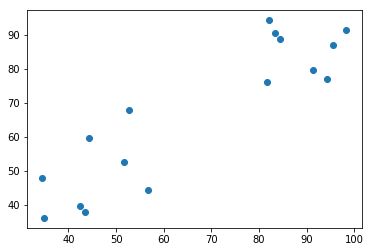

In [34]:
plt.scatter(yld,pred)
plt.show()

In [43]:
np.corrcoef(yld, pred)

array([[1.        , 0.89671196],
       [0.89671196, 1.        ]])

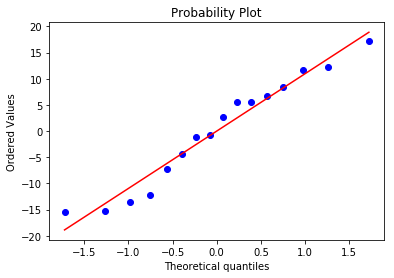

In [37]:
mystats.probplot(res,plot=plt)
plt.show()  #q-q plot, straight line is normal distribution

In [38]:
mystats.normaltest(res) #p value greater than 0.05 means distribution is normal

D:\Users\madhur\Anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


NormaltestResult(statistic=1.8944805759902987, pvalue=0.3878097913672042)

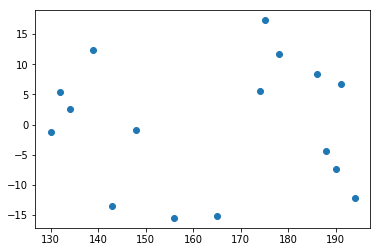

In [40]:
plt.scatter(time,res)
plt.show()

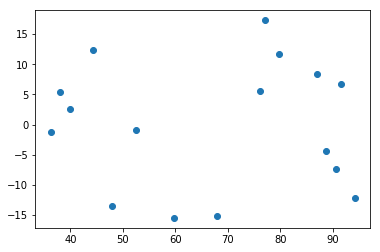

In [41]:
plt.scatter(pred,res)
plt.show()